In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
policy_file_path = "C:/Users/SAPTARSHI/Downloads/policy factors.xlsx"
df_policy = pd.read_excel(policy_file_path)

In [3]:
# Define independent variables (X) and target variable (y)
X_policy = df_policy.drop(columns=["Have you ever crossed the street during a red light?"])
y_policy = df_policy["Have you ever crossed the street during a red light?"]


In [4]:
# Standardize continuous variables
scaler = StandardScaler()
X_policy_scaled = scaler.fit_transform(X_policy)

In [5]:
# Split dataset into training and testing sets
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(
    X_policy_scaled, y_policy, test_size=0.2, random_state=42
)

In [6]:
# Train logistic regression model
log_reg_pol = LogisticRegression()
log_reg_pol.fit(X_train_pol, y_train_pol)


LogisticRegression()

In [7]:
# Get feature importance (coefficients)
feature_importance = log_reg_pol.coef_[0]

In [8]:
# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({"Feature": X_policy.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [9]:
# Print feature importance
print("Feature Importance Ranking:")
print(importance_df)

Feature Importance Ranking:
                                             Feature  Importance
1  What type of public awareness campaign would b...   -0.264361
0  What strategies or policies might make you les...   -1.892260


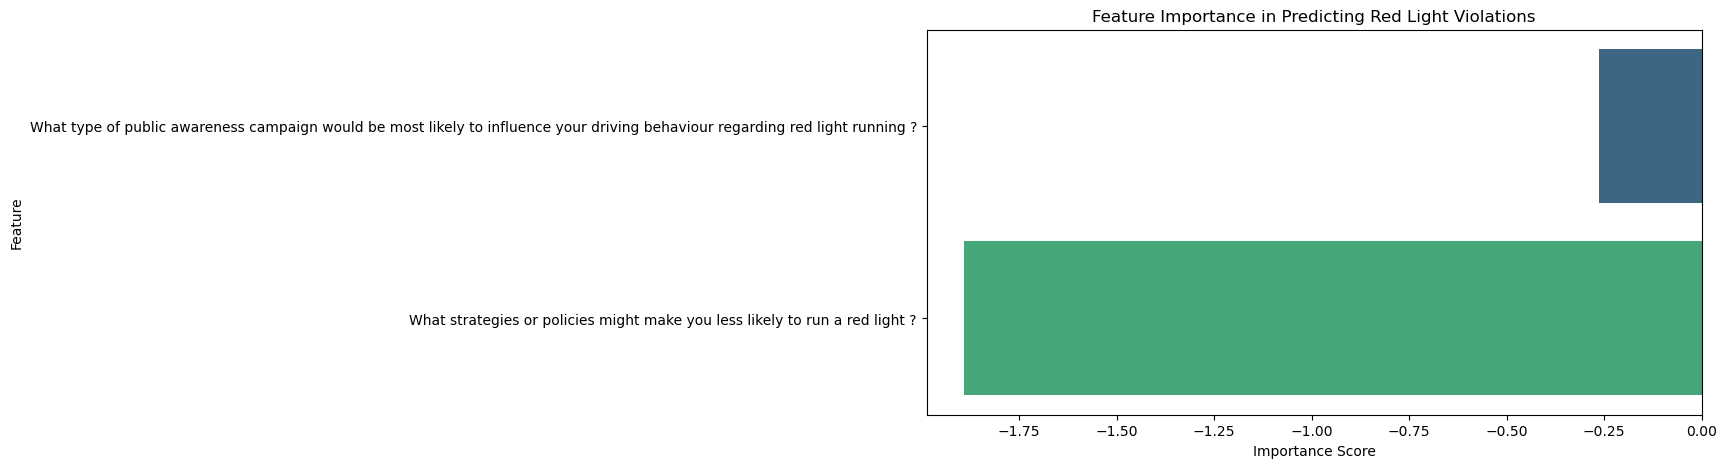

In [10]:
# Visualization of feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Red Light Violations")
plt.show()

In [11]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients_pol = log_reg_pol.coef_[0]
odds_ratios_pol = np.exp(coefficients_pol)

In [12]:
# Create a DataFrame to display feature importance and odds ratios
importance_df_pol = pd.DataFrame(
    {"Feature": X_policy.columns, "Coefficient": coefficients_pol, "Odds_Ratio": odds_ratios_pol}
).sort_values(by="Odds_Ratio", ascending=False)


In [13]:
# Print feature importance and odds ratios
print("Feature Importance and Odds Ratios:")
print(importance_df_pol)


Feature Importance and Odds Ratios:
                                             Feature  Coefficient  Odds_Ratio
1  What type of public awareness campaign would b...    -0.264361    0.767696
0  What strategies or policies might make you les...    -1.892260    0.150731


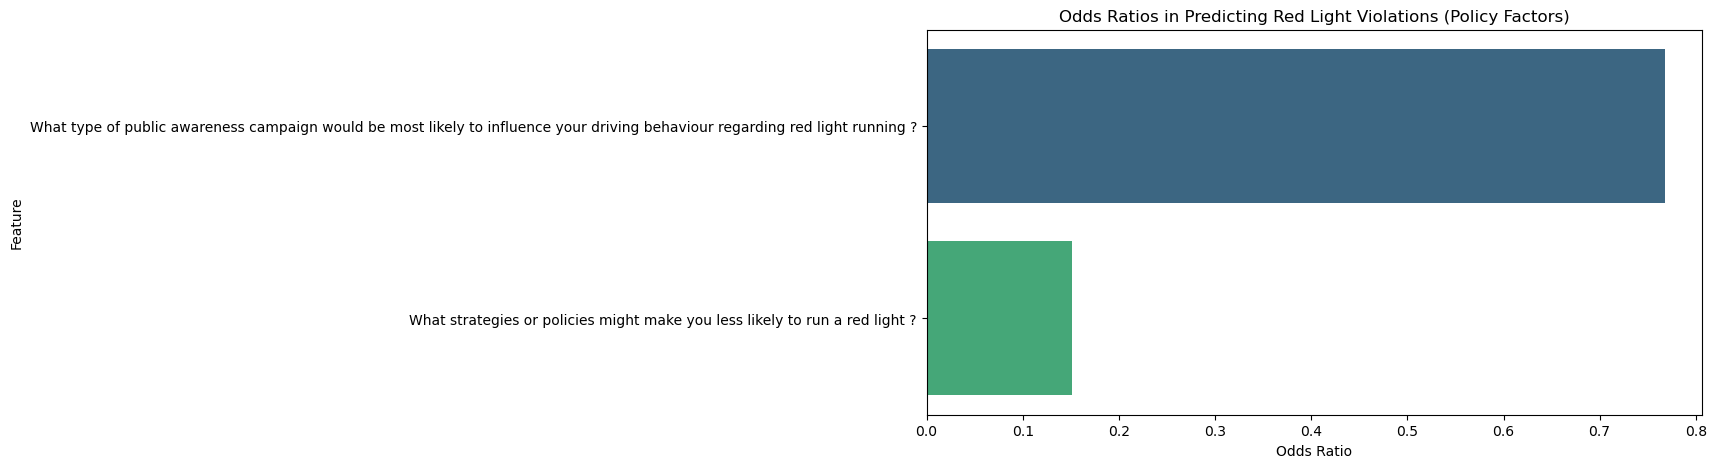

In [14]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_pol["Odds_Ratio"], y=importance_df_pol["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Policy Factors)")
plt.show()